In [2]:
import sys
sys.path.append("..")
import pannzer_out_api as poa
import pandas as pd
import statistics as stats
from scipy.stats.stats import pearsonr, spearmanr
from matplotlib import pyplot
import seaborn as sns

/tmp/ipykernel_108255/4131452706.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr
/tmp/ipykernel_108255/4131452706.py:6: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr


In [3]:
human = poa.parse_pannzer_annotation('/home/pgerenton/Documents/multiisoformVSsingleisoform/data/pannzer_output/human.nr_off.pc.out', 'human_gencode')
mane = poa.parse_pannzer_annotation('/home/pgerenton/Documents/multiisoformVSsingleisoform/data/pannzer_output/human.nr_off.mane.out', 'mane')
mouse = poa.parse_pannzer_annotation('/home/pgerenton/Documents/multiisoformVSsingleisoform/data/pannzer_output/mouse.nr_off.pc.out', 'mouse_gencode')


In [4]:
human.number_of_genes()
human.number_of_isoforms()
len([gene for gene in mane.genes if gene in human.genes and human[gene].number_of_isoforms()>1])


14082

In [5]:
14128/19347

0.7302424148446788

In [6]:
mouse.number_of_isoforms()
len([gene for gene in mouse.genes if mouse[gene].number_of_isoforms()>1])

11901

In [7]:
11901/21329

0.5579727132073703

In [8]:
ggo = [len(g.get_go_term_id()) for g in human.genes.values()]
print(sum(ggo)/len(ggo))
tgo = [len(t.get_go_term_id()) for g in human.genes.values() for t in g.transcripts.values()]
print(sum(tgo)/len(tgo))

81.57166485760067
53.62078021992598


In [9]:
ggo = [len(g.get_go_term_id()) for g in mouse.genes.values()]
print(sum(ggo)/len(ggo))
tgo = [len(t.get_go_term_id()) for g in mouse.genes.values() for t in g.transcripts.values()]
print(sum(tgo)/len(tgo))

77.30760935815087
58.2992431050666


In [10]:
ggo = [len(g.get_go_term_id()) for g in mane.genes.values()]
print(sum(ggo)/len(ggo))
tgo = [len(t.get_go_term_id()) for g in mane.genes.values() for t in g.transcripts.values()]
print(sum(tgo)/len(tgo))

78.66892314101229
78.82374922150716


In [11]:
human_long = poa.make_longest_single_isoform_annotation(human)
human_best = poa.make_best_single_isoform_annotation(human)
mouse_long = poa.make_longest_single_isoform_annotation(mouse)
mouse_best = poa.make_best_single_isoform_annotation(mouse)

In [12]:
print(len(poa.genes_with_diff_go_terms(human, human_best)))
print(len(poa.genes_with_diff_go_terms(human, human_long)))
print(len(poa.genes_with_diff_go_terms(mouse, mouse_best)))
print(len(poa.genes_with_diff_go_terms(mouse, mouse_long)))

620
2621
321
1507


In [13]:
print(len(poa.genes_with_diff_go_terms(human, human_best))/19347)
print(len(poa.genes_with_diff_go_terms(human, human_long))/19347)
print(len(poa.genes_with_diff_go_terms(mouse, mouse_best))/21329)
print(len(poa.genes_with_diff_go_terms(mouse, mouse_long))/21329)

0.032046312089729675
0.13547319997932497
0.015049932017441042
0.07065497679216091


In [14]:
evso_human = pd.read_csv('/home/pgerenton/Documents/multiisoformVSsingleisoform/res/human.precise_analysis_of_one_multiisoform_annotation.data.tsv', sep='\t')

In [15]:
evso_human.describe()

,BP_SIMILARITY,CC_SIMILARITY,MF_SIMILARITY,SHUFFLE_BP_SIM,SHUFFLE_CC_SIM,SHUFFLE_MF_SIM
count,11606.000000,12289.000000,11687.000000,11641.000000,12268.000000,11638.000000
mean,0.986721,0.991280,0.990232,0.775905,0.870473,0.780406
std,0.063110,0.041054,0.050261,0.216602,0.130871,0.203045
min,0.210000,0.368000,0.288000,0.168000,0.239000,0.167000
25%,1.000000,1.000000,1.000000,0.621000,0.789000,0.630000
50%,1.000000,1.000000,1.000000,0.829000,0.904000,0.822000
75%,1.000000,1.000000,1.000000,0.986000,0.994000,0.983000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
sum(evso_human['SHUFFLE_BP_SIM']==1)
# sum(~evso_human['BP_SIMILARITY'].isna())


2602

In [17]:
10463/11606

0.9015164570049974

In [18]:
evso_mouse = pd.read_csv('/home/pgerenton/Documents/multiisoformVSsingleisoform/res/mouse.precise_analysis_of_one_multiisoform_annotation.data.tsv', sep='\t')
evso_mouse.describe()

,BP_SIMILARITY,CC_SIMILARITY,MF_SIMILARITY,SHUFFLE_BP_SIM,SHUFFLE_CC_SIM,SHUFFLE_MF_SIM
count,9621.000000,10056.000000,9374.000000,9779.000000,10088.000000,9607.000000
mean,0.992221,0.994299,0.993064,0.824869,0.899802,0.823375
std,0.048917,0.035314,0.043380,0.199875,0.121573,0.189120
min,0.217000,0.458000,0.336000,0.156000,0.324000,0.180000
25%,1.000000,1.000000,1.000000,0.704000,0.835000,0.698500
50%,1.000000,1.000000,1.000000,0.901000,0.950000,0.883000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
sum(evso_mouse['BP_SIMILARITY']==1)


9040

In [20]:
9040/9621

0.9396112670200603

In [21]:
evso_human['NB_ISOFORM'] = evso_human['GENE_ID'].apply(human.get_gene).apply(poa.Gene.number_of_isoforms)
evso_mouse['NB_ISOFORM'] = evso_mouse['GENE_ID'].apply(mouse.get_gene).apply(poa.Gene.number_of_isoforms)


In [22]:
evso_human
evso_mouse

,GENE_ID,BP_SIMILARITY,CC_SIMILARITY,MF_SIMILARITY,SHUFFLE_BP_SIM,SHUFFLE_CC_SIM,SHUFFLE_MF_SIM,NB_ISOFORM
0,ENSMUSG00000073294,NaN,NaN,NaN,0.623,0.764,0.890,2
1,ENSMUSG00000068270,NaN,1.0,1.000,1.000,1.000,0.964,3
2,ENSMUSG00000050089,1.0,1.0,0.882,1.000,NaN,0.937,2
3,ENSMUSG00000004317,1.0,1.0,1.000,0.933,1.000,0.937,3
4,ENSMUSG00000039556,1.0,1.0,1.000,0.650,0.787,0.366,3
...,...,...,...,...,...,...,...,...
11896,ENSMUSG00000033417,1.0,1.0,1.000,NaN,0.556,0.631,3
11897,ENSMUSG00000024991,1.0,1.0,1.000,1.000,1.000,1.000,2
11898,ENSMUSG00000024993,1.0,1.0,1.000,0.733,0.711,0.409,3
11899,ENSMUSG00000003228,1.0,1.0,1.000,0.999,1.000,NaN,2


In [23]:
cor_df = evso_human[['BP_SIMILARITY','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['BP_SIMILARITY'], cor_df['NB_ISOFORM']))
cor_df = evso_human[['SHUFFLE_BP_SIM','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['SHUFFLE_BP_SIM'], cor_df['NB_ISOFORM']))
cor_df = evso_human[['CC_SIMILARITY','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['CC_SIMILARITY'], cor_df['NB_ISOFORM']))
cor_df = evso_human[['SHUFFLE_CC_SIM','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['SHUFFLE_CC_SIM'], cor_df['NB_ISOFORM']))
cor_df = evso_human[['MF_SIMILARITY','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['MF_SIMILARITY'], cor_df['NB_ISOFORM']))
cor_df = evso_human[['SHUFFLE_MF_SIM','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['SHUFFLE_MF_SIM'], cor_df['NB_ISOFORM']))
cor_df = evso_mouse[['BP_SIMILARITY','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['BP_SIMILARITY'], cor_df['NB_ISOFORM']))
cor_df = evso_mouse[['SHUFFLE_BP_SIM','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['SHUFFLE_BP_SIM'], cor_df['NB_ISOFORM']))
cor_df = evso_mouse[['CC_SIMILARITY','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['CC_SIMILARITY'], cor_df['NB_ISOFORM']))
cor_df = evso_mouse[['SHUFFLE_CC_SIM','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['SHUFFLE_CC_SIM'], cor_df['NB_ISOFORM']))
cor_df = evso_mouse[['MF_SIMILARITY','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['MF_SIMILARITY'], cor_df['NB_ISOFORM']))
cor_df = evso_mouse[['SHUFFLE_MF_SIM','NB_ISOFORM']].copy().dropna()
print(spearmanr(cor_df['SHUFFLE_MF_SIM'], cor_df['NB_ISOFORM']))

SpearmanrResult(correlation=-0.18159186902593263, pvalue=1.310401883246496e-86)
SpearmanrResult(correlation=-0.5644762997868629, pvalue=0.0)
SpearmanrResult(correlation=-0.19786074701464118, pvalue=1.018013545414425e-108)
SpearmanrResult(correlation=-0.5729040243319818, pvalue=0.0)
SpearmanrResult(correlation=-0.16775488115325426, pvalue=1.6307628064592242e-74)
SpearmanrResult(correlation=-0.5780193154076603, pvalue=0.0)
SpearmanrResult(correlation=-0.13226863721823395, pvalue=8.327151312986506e-39)
SpearmanrResult(correlation=-0.4736337782084944, pvalue=0.0)
SpearmanrResult(correlation=-0.1455815323373581, pvalue=9.282041274160892e-49)
SpearmanrResult(correlation=-0.47513665766751817, pvalue=0.0)
SpearmanrResult(correlation=-0.13631836766450056, pvalue=4.0321043114328424e-40)
SpearmanrResult(correlation=-0.49112843816880486, pvalue=0.0)


In [24]:
fig = pyplot.subplot(221)
fig.
sns.regplot(x = evso_human['BP_SIMILARITY'], y = evso_human['NB_ISOFORM'])
pyplot.title("Number of isoform by BP similarity of genes (human, observed)")
pyplot.xlabel("GOGO Similarity")
pyplot.ylabel("Number of isoforms")


SyntaxError: invalid syntax (1549885754.py, line 2)

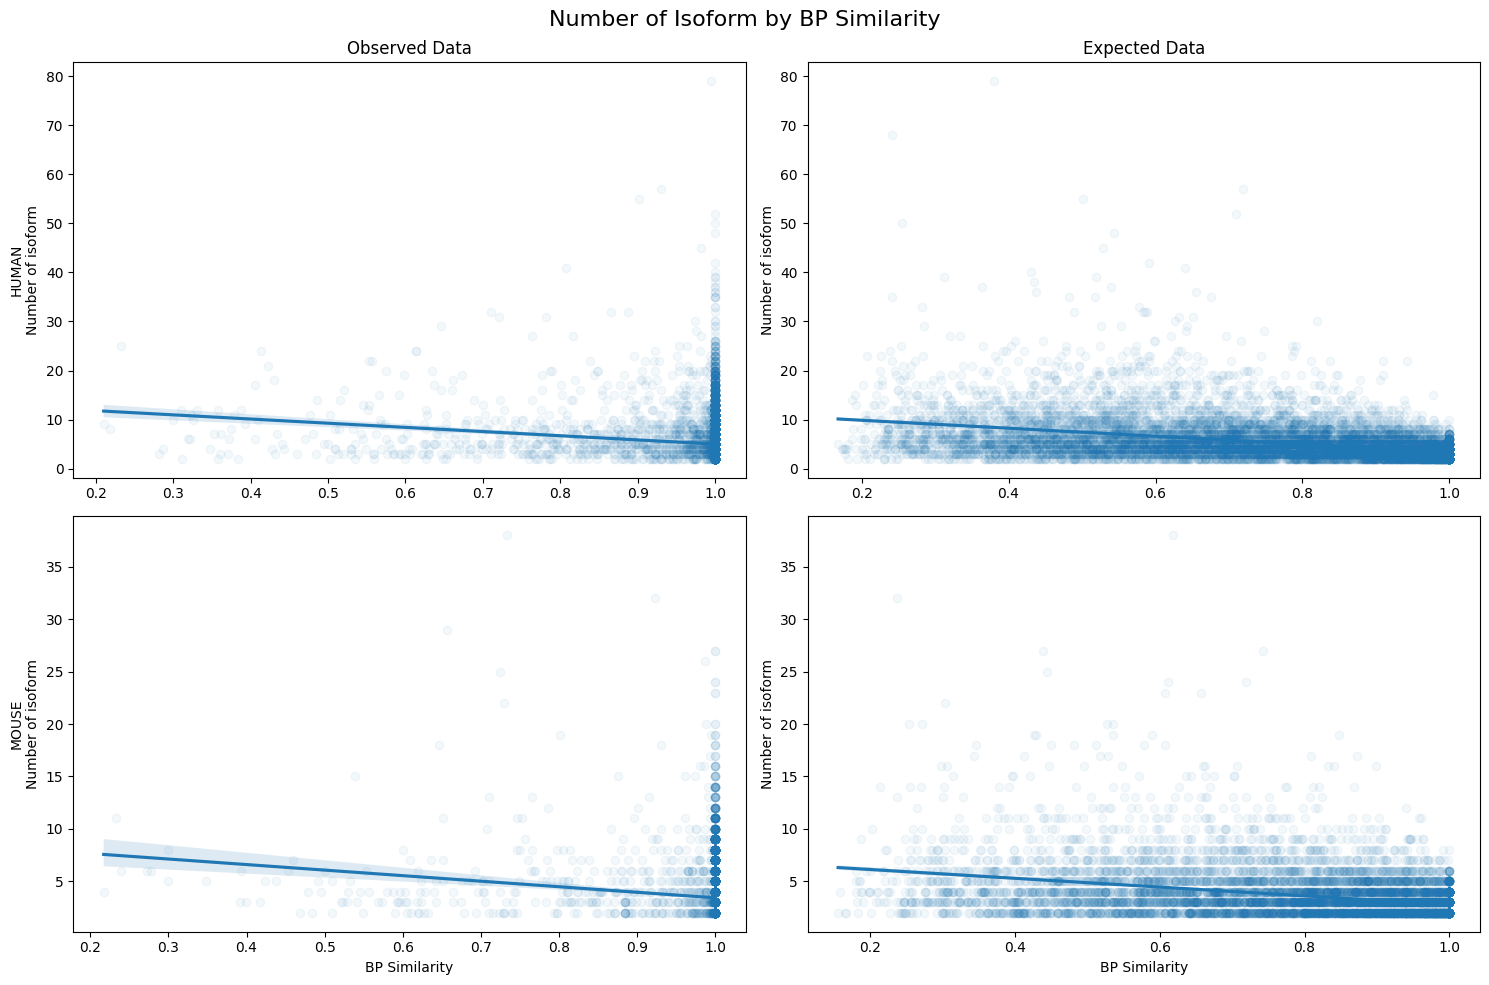

In [30]:
fig, axes = pyplot.subplots(2, 2, figsize=(15, 10))

row_titles = ['Human', 'Mouse']
col_titles = ['Observed', 'Expected']

sns.regplot(data=evso_human, x='BP_SIMILARITY', y="NB_ISOFORM", ax = axes[0,0], scatter_kws={'alpha': 0.05})
sns.regplot(data=evso_human, x='SHUFFLE_BP_SIM', y="NB_ISOFORM", ax = axes[0,1], scatter_kws={'alpha': 0.05})

sns.regplot(data=evso_mouse, x='BP_SIMILARITY', y="NB_ISOFORM", ax = axes[1,0], scatter_kws={'alpha': 0.05})
sns.regplot(data=evso_mouse, x='SHUFFLE_BP_SIM', y="NB_ISOFORM", ax = axes[1,1], scatter_kws={'alpha': 0.05})


axes[0,0].set_title('Observed Data')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('HUMAN\nNumber of isoform')

axes[0,1].set_title('Expected Data')
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Number of isoform')

axes[1,0].set_xlabel('BP Similarity')
axes[1,0].set_ylabel('MOUSE\nNumber of isoform')

axes[1,1].set_xlabel('BP Similarity')
axes[1,1].set_ylabel('Number of isoform')

fig.suptitle("Number of Isoform by BP Similarity", fontsize=16)

pyplot.tight_layout()
